In [39]:
!pip install openpyxl
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/dubizzle.xlsx')

In [41]:
def wrangle(dubbi):
    # Displaying the initial observations
    print("Initial Observations:")
    print(dubbi.head(5))
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(dubbi.info(show_counts=True))
    print()

    dubbi.dropna(subset=['Location','Price'],inplace=True)

    # Check for duplicated rows
    print("Number of duplicated rows:", dubbi.duplicated().sum())
    print()

    dubbi.drop_duplicates(inplace=True)
    print("Number of duplicated rows after dropping:", dubbi.duplicated().sum())
    print()

    # Conducting an examination of data types and missing values
    print("Info about data:")
    print(dubbi.info(show_counts=True))
    print()

    # Descriptive statistics
    print("Descriptive Statistics:")
    print(dubbi.describe())
    print()

    print("Shape of data:")
    print(dubbi.shape)
    print()

    # Columns with null values
    print("Columns with null values:")
    columns_with_null = dubbi.columns[dubbi.isnull().any()].tolist()
    print(columns_with_null)
    print()

    return dubbi

wrangle(df)

Initial Observations:
                            Source.Name       Type Ownership  Area (m²)  \
0  dubizzle_apartments_data_batch_1.csv  Apartment   Primary      136.0   
1  dubizzle_apartments_data_batch_1.csv  Apartment   Primary      140.0   
2  dubizzle_apartments_data_batch_1.csv     Duplex    Resale      380.0   
3  dubizzle_apartments_data_batch_1.csv  Apartment   Primary      165.0   
4  dubizzle_apartments_data_batch_1.csv     Duplex   Primary      300.0   

   Bedrooms  Bathrooms Furnished       Payment Option Completion status  \
0       2.0        2.0        No  Cash or Installment             Ready   
1       3.0        3.0       NaN                 Cash             Ready   
2       5.0        6.0        No                 Cash             Ready   
3       3.0        2.0        No                 Cash             Ready   
4       3.0        3.0        No                 Cash             Ready   

   Delivery Term  ... Listing date          Price              Down Payment 

,Source.Name,Type,Ownership,Area (m²),Bedrooms,Bathrooms,Furnished,Payment Option,Completion status,Delivery Term,...,Listing date,Price,Down Payment,Amenities,Level,Price Type,Delivery Date,Compound,Unnamed: 19,Unnamed: 20
0,dubizzle_apartments_data_batch_1.csv,Apartment,Primary,136.0,2.0,2.0,No,Cash or Installment,Ready,Semi Finished,...,3 weeks ago,"EGP 9,400,000","EGP 470,000 Down Payment","['Pool', 'Electricity Meter', 'Water Meter', '...",NaN,NaN,NaN,NaN,NaN,NaN
1,dubizzle_apartments_data_batch_1.csv,Apartment,Primary,140.0,3.0,3.0,NaN,Cash,Ready,NaN,...,2 weeks ago,"EGP 1,960,000",NaN,"['Maids Room', 'Pets Allowed', 'Pool', 'Electr...",NaN,NaN,NaN,NaN,NaN,NaN
2,dubizzle_apartments_data_batch_1.csv,Duplex,Resale,380.0,5.0,6.0,No,Cash,Ready,Semi Finished,...,2 weeks ago,"EGP 8,200,000",NaN,"['Pool', 'Electricity Meter', 'Water Meter', '...",Ground,NaN,NaN,NaN,NaN,NaN
3,dubizzle_apartments_data_batch_1.csv,Apartment,Primary,165.0,3.0,2.0,No,Cash,Ready,Finished,...,2 weeks ago,"EGP 2,750,000",NaN,['Balcony'],1,NaN,NaN,NaN,NaN,NaN
4,dubizzle_apartments_data_batch_1.csv,Duplex,Primary,300.0,3.0,3.0,No,Cash,Ready,Finished,...,2 weeks ago,"EGP 4,750,000",NaN,[],Ground,Negotiable,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982616,dubizzle_apartments_data_batch_9.csv,Apartment,Primary,130.0,3.0,1.0,No,Cash,Ready,Finished,...,3 weeks ago,"EGP 1,150,000",NaN,['Elevator'],1,NaN,NaN,NaN,NaN,NaN
982617,dubizzle_apartments_data_batch_9.csv,Apartment,Primary,90.0,2.0,2.0,No,Cash,Off-plan,NaN,...,2 weeks ago,"EGP 10,764,000",NaN,"['Pool', 'Electricity Meter', 'Water Meter', '...",NaN,NaN,NaN,NaN,NaN,NaN
982619,dubizzle_apartments_data_batch_9.csv,Apartment,Resale,96.0,2.0,1.0,No,Cash,Ready,NaN,...,3 weeks ago,"EGP 1,500,000",NaN,[],NaN,NaN,NaN,NaN,NaN,NaN
982620,dubizzle_apartments_data_batch_9.csv,Apartment,Resale,80.0,2.0,1.0,No,Cash,Ready,Semi Finished,...,3 weeks ago,"EGP 900,000",NaN,[],Ground,NaN,NaN,NaN,NaN,NaN


In [42]:
df['Location.1']=df['Location'].str.split(',',expand=True)[0]
df['Location.2']=df['Location'].str.split(',',expand=True)[1]
df.drop(columns=['Location'],inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361205 entries, 0 to 982621
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Source.Name        361205 non-null  object 
 1   Type               361205 non-null  object 
 2   Ownership          350164 non-null  object 
 3   Area (m²)          361205 non-null  float64
 4   Bedrooms           361205 non-null  float64
 5   Bathrooms          361205 non-null  float64
 6   Furnished          272233 non-null  object 
 7   Payment Option     355768 non-null  object 
 8   Completion status  348235 non-null  object 
 9   Delivery Term      163912 non-null  object 
 10  Listing date       361205 non-null  object 
 11  Price              361205 non-null  object 
 12  Down Payment       187980 non-null  object 
 13  Amenities          361205 non-null  object 
 14  Level              161874 non-null  object 
 15  Price Type         60131 non-null   object 
 16  Deliver

In [44]:
df.isnull().sum()

,0
Source.Name,0
Type,0
Ownership,11041
Area (m²),0
Bedrooms,0
Bathrooms,0
Furnished,88972
Payment Option,5437
Completion status,12970
Delivery Term,197293


In [45]:
dt=df.drop(columns=['Source.Name','Unnamed: 19','Unnamed: 20','Compound','Delivery Date'])

In [46]:
dt['Price'] = dt['Price'].str.replace('EGP ', '').str.replace(',', '').astype(float)
dt['Down Payment'] = dt['Down Payment'].str.replace('EGP ', '').str.replace(',', '').str.replace(' Down Payment','').str.replace('%','').astype(float)

In [47]:
dt.isnull().sum()

,0
Type,0
Ownership,11041
Area (m²),0
Bedrooms,0
Bathrooms,0
Furnished,88972
Payment Option,5437
Completion status,12970
Delivery Term,197293
Listing date,0


In [48]:
for index in dt.index:
    if pd.isnull(dt.loc[index, 'Payment Option']):
        if pd.notna(dt.loc[index, 'Down Payment']):
            dt.loc[index, 'Payment Option'] = 'Installment'
        else:
            dt.loc[index, 'Payment Option'] = 'Cash'

In [49]:
dt.isnull().sum()

,0
Type,0
Ownership,11041
Area (m²),0
Bedrooms,0
Bathrooms,0
Furnished,88972
Payment Option,0
Completion status,12970
Delivery Term,197293
Listing date,0


In [50]:
dt['Bathrooms']=dt['Bathrooms'].astype(int)
dt['Bedrooms']=dt['Bedrooms'].astype(int)

In [51]:
from datetime import datetime, timedelta
import re

# Function to convert relative dates to absolute dates
def convert_relative_date(relative_date):
    # Current date as reference
    today = datetime.today()

    # Check if the date mentions weeks, days, or months, and extract the number
    if 'week' in relative_date:
        num_weeks = int(re.search(r'(\d+)', relative_date).group(0))
        return today - timedelta(weeks=num_weeks)

    elif 'day' in relative_date:
        num_days = int(re.search(r'(\d+)', relative_date).group(0))
        return today - timedelta(days=num_days)

    elif 'month' in relative_date:
        num_months = int(re.search(r'(\d+)', relative_date).group(0))
        return today - timedelta(days=num_months * 30)  # Approximate months as 30 days

    elif 'year' in relative_date:
        num_years = int(re.search(r'(\d+)', relative_date).group(0))
        return today - timedelta(days=num_years * 365)  # Approximate year as 365 days

    elif 'yesterday' in relative_date:
        return today - timedelta(days=1)

    # Default if there's no match or unknown format
    return None

# Apply the function to the 'Listing date' column
dt['Listing date'] = dt['Listing date'].apply(lambda x: convert_relative_date(x) if pd.notnull(x) else None)

# Display the updated 'Listing date' column
dt[['Listing date']].head()


,Listing date
0,2024-10-07 22:33:20.988114
1,2024-10-14 22:33:20.988146
2,2024-10-14 22:33:20.988154
3,2024-10-14 22:33:20.988160
4,2024-10-14 22:33:20.988165


In [52]:
import numpy as np
# Handle missing values in 'Ownership' column by replacing NaN with 'Unknown'
dt['Ownership'].fillna('Unknown', inplace=True)

# Handle missing values in 'Completion status' column with 'Unknown'
dt['Completion status'].fillna(dt['Completion status'].mode()[0], inplace=True)

dt['Price Type'].fillna('Non Negotiable', inplace=True)

dt["Down Payment"] = np.where(dt["Payment Option"]=="Cash", 0, dt["Down Payment"])
dt["Down Payment"].isnull().sum()


dt["Furnished"].fillna(dt["Furnished"].mode()[0],inplace=True)
dt["Furnished"].isnull().sum()

dt['Level'] = dt['Level'].replace({'Ground': 0, '10+': 12,"Highest":15})
dt['Level'].isnull().sum()
dt['Level'] = dt['Level'].astype(int)

dt['Level'] = dt['Level'].fillna(method='bfill')
dt['Level'].isnull().sum()

dt["Delivery Term"].fillna(dt["Delivery Term"].mode()[0],inplace=True)
dt["Delivery Term"].isnull().sum()


dt['Listing date'].fillna(dt['Listing date'].mode()[0],inplace=True)

<ipython-input-52-156d39a3c45b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt['Ownership'].fillna('Unknown', inplace=True)
<ipython-input-52-156d39a3c45b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

0

In [53]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361205 entries, 0 to 982621
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Type               361205 non-null  object        
 1   Ownership          361205 non-null  object        
 2   Area (m²)          361205 non-null  float64       
 3   Bedrooms           361205 non-null  int64         
 4   Bathrooms          361205 non-null  int64         
 5   Furnished          361205 non-null  object        
 6   Payment Option     361205 non-null  object        
 7   Completion status  361205 non-null  object        
 8   Delivery Term      163912 non-null  object        
 9   Listing date       343482 non-null  datetime64[ns]
 10  Price              361205 non-null  float64       
 11  Down Payment       361205 non-null  float64       
 12  Amenities          361205 non-null  object        
 13  Level              361205 non-null  object       

In [57]:
dt["Delivery Term"].fillna(dt["Delivery Term"].mode()[0],inplace=True)
dt["Delivery Term"].isnull().sum()

<ipython-input-57-f13964382a3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt["Delivery Term"].fillna(dt["Delivery Term"].mode()[0],inplace=True)


0

In [68]:
dt.isnull().sum()

,0
Type,0
Ownership,0
Area (m²),0
Bedrooms,0
Bathrooms,0
Furnished,0
Payment Option,0
Completion status,0
Delivery Term,0
Listing date,0


In [59]:
dt.describe()

,Area (m²),Bedrooms,Bathrooms,Listing date,Price,Down Payment
count,361205.000000,361205.000000,361205.000000,343482,3.612050e+05,3.612050e+05
mean,164.651669,2.754419,2.323800,2024-10-12 01:08:40.782815232,7.043605e+06,1.075122e+06
min,10.000000,1.000000,1.000000,2024-02-01 22:33:21.060884,2.250000e+04,0.000000e+00
25%,126.000000,2.000000,2.000000,2024-10-07 22:33:21.657198848,3.500000e+06,0.000000e+00
50%,156.000000,3.000000,2.000000,2024-10-14 22:33:21.131787008,5.952300e+06,0.000000e+00
75%,191.000000,3.000000,3.000000,2024-10-14 22:33:21.855512320,9.000000e+06,1.100000e+06
max,1200.000000,10.000000,10.000000,2024-10-27 22:33:22.340390,2.500000e+08,3.000000e+08
std,66.959431,0.783400,0.836263,NaN,6.187576e+06,3.964312e+06


In [69]:
dt.head(10)

,Type,Ownership,Area (m²),Bedrooms,Bathrooms,Furnished,Payment Option,Completion status,Delivery Term,Listing date,Price,Down Payment,Amenities,Level,Price Type,Location.1,Location.2
0,Apartment,Primary,136.0,2,2,No,Cash or Installment,Ready,Semi Finished,2024-10-07 22:33:20.988114,9400000.0,470000.0,"['Pool', 'Electricity Meter', 'Water Meter', '...",0,Non Negotiable,Avelin Compound,New Cairo
1,Apartment,Primary,140.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988146,1960000.0,0.0,"['Maids Room', 'Pets Allowed', 'Pool', 'Electr...",0,Non Negotiable,Maadi View,Shorouk City
2,Duplex,Resale,380.0,5,6,No,Cash,Ready,Semi Finished,2024-10-14 22:33:20.988154,8200000.0,0.0,"['Pool', 'Electricity Meter', 'Water Meter', '...",0,Non Negotiable,Obour City,Cairo
3,Apartment,Primary,165.0,3,2,No,Cash,Ready,Finished,2024-10-14 22:33:20.988160,2750000.0,0.0,['Balcony'],1,Non Negotiable,Hadayek al-Ahram,Giza
4,Duplex,Primary,300.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988165,4750000.0,0.0,[],0,Negotiable,Hadayek al-Ahram,Giza
5,Apartment,Primary,185.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988170,3000000.0,0.0,"['Landline', 'Balcony', 'Security', 'Covered P...",4,Non Negotiable,Bloomfields,Mostakbal City
6,Apartment,Primary,195.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988175,3500000.0,0.0,"['Landline', 'Balcony', 'Security', 'Covered P...",4,Non Negotiable,Haptown,Mostakbal City
7,Apartment,Primary,130.0,2,2,No,Cash,Ready,Finished,2024-10-14 22:33:20.988180,2500000.0,0.0,"['Balcony', 'Covered Parking', 'Natural Gas', ...",4,Non Negotiable,Valeria Maadi,Zahraa Al Maadi
8,Apartment,Primary,185.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988185,3000000.0,0.0,"['Landline', 'Balcony', 'Security', 'Covered P...",1,Non Negotiable,Bloomfields,Mostakbal City
9,Apartment,Primary,194.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988189,3000000.0,0.0,[],1,Non Negotiable,Mostakbal City,Cairo


In [72]:
dt['Location.2'].value_counts()

,count
Location.2,
New Cairo,119574
Cairo,76272
Mostakbal City,26793
6th of October,21086
Sheikh Zayed,19882
Giza,19603
Alexandria,17610
New Capital City,9750
New Heliopolis,5361


In [73]:
# Step 1: Clean the data in Location.2 by stripping whitespace
dt['Location.2'] = dt['Location.2'].str.strip()

# Step 2: Ensure that the mapping works regardless of case
# Optionally, convert the Location.2 values to lower case
dt['Location.2'] = dt['Location.2'].str.lower()

# Update the city_mapping keys to match lower case
city_mapping = {
    'new cairo': 'cairo',
    'mostakbal city': 'cairo',
    '6th of october': 'cairo',
    'new heliopolis': 'cairo',
    'shorouk city': 'cairo',
    'madinaty': 'cairo',
    'hadayek october': 'cairo',
    'sheraton': 'cairo',
    'badr city': 'cairo',
    'nasr city': 'cairo',
    'heliopolis city': 'cairo',
    'heliopolis': 'cairo',
    'mokattam': 'cairo',
    'zamalek': 'cairo',
    'dokki': 'cairo',
    'obour city': 'cairo',
    'maadi': 'cairo',
    'katameya': 'cairo',
    'zahraa al maadi': 'cairo',
    'sheikh zayed': 'cairo',
    'smoha': 'alexandria',
    'moharam bik': 'alexandria',
    'amreya': 'alexandria',
    'agami': 'alexandria',
    'borg al-arab': 'alexandria',
    'alamein': 'north coast',
    'ain sukhna': 'red sea',
    'makadi bay': 'red sea',
    'new damietta': 'damietta',
    'new mansoura': 'dakahlia'

}

# Step 3: Replace cities with their mapped values
dt['Location.2'] = dt['Location.2'].replace(city_mapping)
# Step 4: Convert the Location.2 values to title case for proper capitalization
dt['Location.2'] = dt['Location.2'].str.title()
# Rename the column Location.2 to City
dt.rename(columns={'Location.2': 'City'}, inplace=True)

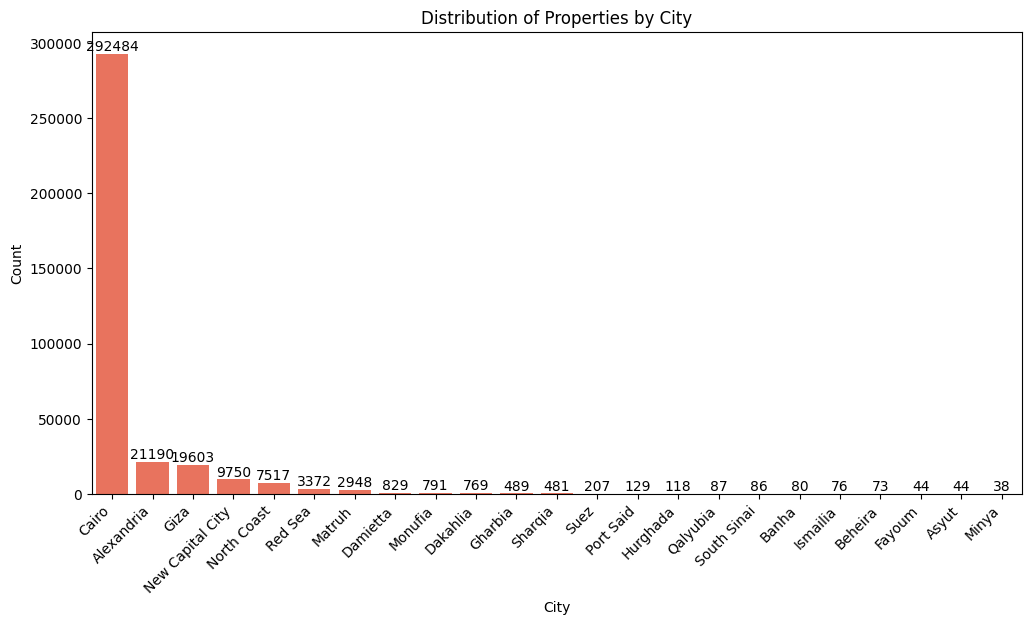

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# Step 1: Get the counts of properties per city
city_counts = dt['City'].value_counts()

# Step 2: Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=dt, order=city_counts.index,color="tomato")  # Use order to include all cities
plt.title('Distribution of Properties by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Step 3: Annotate the counts above the bars
for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.show()


In [75]:
# Step 1: Clean and split the 'Amenities' column into lists of amenities
dt['Amenities'] = (
    dt['Amenities']
    .str.strip("[]")               # Remove brackets
    .str.replace("'", "")          # Remove single quotes
    .str.split(", ")               # Split amenities into lists
)

# Step 2: Extract all unique amenities across all listings
all_amenities = set(amenity for amenities in dt['Amenities'] for amenity in amenities if amenity)

# Step 3: Create a binary indicator column for each amenity
for amenity in all_amenities:
    dt[amenity] = dt['Amenities'].apply(lambda x: 1 if amenity in x else 0)

# Step 4: Summarize the total number of listings that have each amenity
amenities_summary = dt[list(all_amenities)].sum().sort_values(ascending=False)

# Display the top amenities
print("Top Amenities in the Dataset:")
print(amenities_summary.head(10))

Top Amenities in the Dataset:
Electricity Meter    210746
Security             198515
Water Meter          196269
Balcony              194674
Natural Gas          178331
Covered Parking      169217
Pets Allowed         161209
Landline             139695
Private Garden       126979
Pool                 113219
dtype: int64


In [76]:
# Step 1: Add a new column 'Total_Amenities' with the count of amenities for each listing
dt['Total_Amenities'] = dt[list(all_amenities)].sum(axis=1)

# Step 2: Add a new column 'Fully_Equipped' to indicate if essential amenities are present
# Define essential amenities (you can customize this list)
essential_amenities = ['Electricity Meter', 'Water Meter', 'Security']

# Check if each listing has all essential amenities
dt['Fully_Equipped'] = dt[essential_amenities].all(axis=1).astype(int)

# Display the updated dataset with new summary columns
dt[['Amenities', 'Total_Amenities', 'Fully_Equipped']].head()

,Amenities,Total_Amenities,Fully_Equipped
0,"[Pool, Electricity Meter, Water Meter, Natural...",11,1
1,"[Maids Room, Pets Allowed, Pool, Electricity M...",13,1
2,"[Pool, Electricity Meter, Water Meter, Natural...",12,1
3,[Balcony],1,0
4,[],0,0


In [78]:
dt.head(10)

,Type,Ownership,Area (m²),Bedrooms,Bathrooms,Furnished,Payment Option,Completion status,Delivery Term,Listing date,...,Private Garden,Covered Parking,Electricity Meter,Balcony,Central A/C & heating,Water Meter,Landline,Security,Total_Amenities,Fully_Equipped
0,Apartment,Primary,136.0,2,2,No,Cash or Installment,Ready,Semi Finished,2024-10-07 22:33:20.988114,...,1,1,1,1,0,1,1,1,11,1
1,Apartment,Primary,140.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988146,...,1,1,1,1,1,1,1,1,13,1
2,Duplex,Resale,380.0,5,6,No,Cash,Ready,Semi Finished,2024-10-14 22:33:20.988154,...,1,1,1,1,0,1,1,1,12,1
3,Apartment,Primary,165.0,3,2,No,Cash,Ready,Finished,2024-10-14 22:33:20.988160,...,0,0,0,1,0,0,0,0,1,0
4,Duplex,Primary,300.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988165,...,0,0,0,0,0,0,0,0,0,0
5,Apartment,Primary,185.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988170,...,0,1,1,1,0,1,1,1,7,1
6,Apartment,Primary,195.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988175,...,0,1,1,1,0,1,1,1,7,1
7,Apartment,Primary,130.0,2,2,No,Cash,Ready,Finished,2024-10-14 22:33:20.988180,...,0,1,0,1,0,0,1,0,4,0
8,Apartment,Primary,185.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988185,...,0,1,1,1,0,1,1,1,7,1
9,Apartment,Primary,194.0,3,3,No,Cash,Ready,Finished,2024-10-14 22:33:20.988189,...,0,0,0,0,0,0,0,0,0,0


In [79]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 361205 entries, 0 to 982621
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Type                         361205 non-null  object        
 1   Ownership                    361205 non-null  object        
 2   Area (m²)                    361205 non-null  float64       
 3   Bedrooms                     361205 non-null  int64         
 4   Bathrooms                    361205 non-null  int64         
 5   Furnished                    361205 non-null  object        
 6   Payment Option               361205 non-null  object        
 7   Completion status            361205 non-null  object        
 8   Delivery Term                361205 non-null  object        
 9   Listing date                 361205 non-null  datetime64[ns]
 10  Price                        361205 non-null  float64       
 11  Down Payment                 36

In [81]:
# Creating unique dimensions from the original DataFrame

# Dimension Table: Location_Dim
location_dim = dt[['City', 'Location.1']].drop_duplicates().reset_index(drop=True)
location_dim['Location_ID'] = location_dim.index + 1

# Dimension Table: Type_Dim
type_dim = dt[['Type', 'Furnished', 'Completion status', 'Delivery Term']].drop_duplicates().reset_index(drop=True)
type_dim['Type_ID'] = type_dim.index + 1

# Dimension Table: Ownership_Dim
ownership_dim = dt[['Ownership']].drop_duplicates().reset_index(drop=True)
ownership_dim['Ownership_ID'] = ownership_dim.index + 1

# Dimension Table: Payment_Option_Dim
payment_option_dim = dt[['Payment Option']].drop_duplicates().reset_index(drop=True)
payment_option_dim['Payment_Option_ID'] = payment_option_dim.index + 1

# Dimension Table: Price_Type_Dim
price_type_dim = dt[['Price Type']].drop_duplicates().reset_index(drop=True)
price_type_dim['Price_Type_ID'] = price_type_dim.index + 1

# Dimension Table: Amenities_Dim
amenities_columns = [
    'Elevator', 'Maids Room', 'Built in Kitchen Appliances', 'Pets Allowed',
    'Natural Gas', 'Pool', 'Private Garden', 'Covered Parking',
    'Electricity Meter', 'Balcony', 'Central A/C & heating',
    'Water Meter', 'Landline', 'Security'
]
amenities_dim = dt[amenities_columns].drop_duplicates().reset_index(drop=True)
amenities_dim['Amenities_ID'] = amenities_dim.index + 1




In [82]:
# Merging dimension IDs with the main dataframe to create the fact table
dt = dt.merge(location_dim, on=['City', 'Location.1'], how='left')\
       .merge(type_dim, on=['Type', 'Furnished', 'Completion status', 'Delivery Term'], how='left')\
       .merge(ownership_dim, on='Ownership', how='left')\
       .merge(payment_option_dim, on='Payment Option', how='left')\
       .merge(price_type_dim, on='Price Type', how='left')\
       .merge(amenities_dim, on=amenities_columns, how='left')

# Selecting relevant columns for the fact table
fact_table = dt[['Location_ID', 'Type_ID', 'Ownership_ID', 'Payment_Option_ID',
                 'Price_Type_ID', 'Amenities_ID', 'Area (m²)', 'Bedrooms',
                 'Bathrooms', 'Price', 'Down Payment', 'Level',
                 'Listing date', 'Total_Amenities', 'Fully_Equipped']]

# Adding a unique ID for the fact table
fact_table['Property_ID'] = fact_table.index + 1


<ipython-input-82-7b1b97ae2f16>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fact_table['Property_ID'] = fact_table.index + 1


In [83]:
amenities_dim

,Elevator,Maids Room,Built in Kitchen Appliances,Pets Allowed,Natural Gas,Pool,Private Garden,Covered Parking,Electricity Meter,Balcony,Central A/C & heating,Water Meter,Landline,Security,Amenities_ID
0,0,0,1,1,1,1,1,1,1,1,0,1,1,1,1
1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2
2,1,1,0,1,1,1,1,1,1,1,0,1,1,1,3
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,0,0,0,1,1,1,0,1,1,0,1,1,1,0,1355
1355,0,1,0,0,1,1,0,1,1,0,0,1,0,1,1356
1356,0,0,1,1,1,0,0,0,1,0,0,1,1,1,1357
1357,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1358


In [84]:
ownership_dim

,Ownership,Ownership_ID
0,Primary,1
1,Resale,2
2,Unknown,3


In [85]:
payment_option_dim

,Payment Option,Payment_Option_ID
0,Cash or Installment,1
1,Cash,2
2,Installment,3


In [86]:
price_type_dim

,Price Type,Price_Type_ID
0,Non Negotiable,1
1,Negotiable,2


In [87]:
fact_table

,Location_ID,Type_ID,Ownership_ID,Payment_Option_ID,Price_Type_ID,Amenities_ID,Area (m²),Bedrooms,Bathrooms,Price,Down Payment,Level,Listing date,Total_Amenities,Fully_Equipped,Property_ID
0,1,1,1,1,1,1,136.0,2,2,9400000.0,470000.0,0,2024-10-07 22:33:20.988114,11,1,1
1,2,2,1,2,1,2,140.0,3,3,1960000.0,0.0,0,2024-10-14 22:33:20.988146,13,1,2
2,3,3,2,2,1,3,380.0,5,6,8200000.0,0.0,0,2024-10-14 22:33:20.988154,12,1,3
3,4,2,1,2,1,4,165.0,3,2,2750000.0,0.0,1,2024-10-14 22:33:20.988160,1,0,4
4,4,4,1,2,2,5,300.0,3,3,4750000.0,0.0,0,2024-10-14 22:33:20.988165,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361200,67,2,1,2,1,287,130.0,3,1,1150000.0,0.0,1,2024-10-07 22:33:22.350672,1,0,361201
361201,127,6,1,2,1,1,90.0,2,2,10764000.0,0.0,0,2024-10-14 22:33:22.350676,11,1,361202
361202,462,2,2,2,1,5,96.0,2,1,1500000.0,0.0,0,2024-10-07 22:33:22.350680,0,0,361203
361203,195,1,2,2,1,5,80.0,2,1,900000.0,0.0,0,2024-10-07 22:33:22.350684,0,0,361204


In [88]:
# Export each dimension and fact table to CSV
fact_table.to_csv('Property_Facts.csv', index=False)
location_dim.to_csv('Location_Dim.csv', index=False)
type_dim.to_csv('Type_Dim.csv', index=False)
ownership_dim.to_csv('Ownership_Dim.csv', index=False)
payment_option_dim.to_csv('Payment_Option_Dim.csv', index=False)
price_type_dim.to_csv('Price_Type_Dim.csv', index=False)
amenities_dim.to_csv('Amenities_Dim.csv', index=False)

In [89]:
dt.to_csv('/content/drive/MyDrive/dubizzle_cleaned.csv', index=False)